In [1]:
%load_ext autoreload
%autoreload 2

In [77]:
import pandas as pd
from pathlib import Path
from scipy.stats import pearsonr
import yaml
from figural.utils import grouped_corr, load_data_and_gt

Load all ground truth, concate, load results, merge and clean.

In [78]:
results = load_data_and_gt(configpath='../../config.yaml', results_path='../../data/metrics/all_data.csv')
results.sample(2)

Ground Truth size:  (22082, 12)


,path,blank_dist,id,contrast_factor,crop_bottom,test,task,activity,avg_dist,zlist_least_dist,...,elaboration_raw,img_path,F,O,T,E,R,C,name,reg_err
19286,../../data/outputs/bookletb/activity1/30e2f-76...,0.208751,30e2f-76948,4,True,ttct,bookletb,activity1,0.115985,NaN,...,0.140765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
13637,../../data/outputs/bookletb/activity2c/67682-7...,0.294374,67682-74311,4,False,ttct,bookletb,activity2c,0.282851,NaN,...,0.099412,NaN,1.0,0.0,3.0,10.0,2.0,1.0,The elephant nose,False


## Elaboration

In [12]:
# TODO crop bottom values are the same true/false, doublecheck for errors
grouped_corr(results, ['test', 'crop_bottom', 'task', 'activity'],  'E', 'elaboration_raw')

# tests without GT:18988


corr    pval
test crop_bottom task     activity                
ttct False       bookleta activity1   0.20  0.0002
                          activity2a  0.47  0.0000
                          activity2b  0.46  0.0000
                          activity2c  0.49  0.0000
                          activity2d  0.21  0.0001
                          activity2e  0.36  0.0000
                          activity2f  0.40  0.0000
                          activity2g  0.47  0.0000
                          activity2h  0.52  0.0000
                          activity2i  0.39  0.0000
                          activity2j  0.38  0.0000
                 bookletb activity2a  0.56  0.0000
                          activity2b  0.45  0.0000
                          activity2c  0.48  0.0000
                          activity2d  0.40  0.0000
                          activity2e  0.32  0.0000
                          activity2f  0.27  0.0000
                          activity2g  0.23  0.0003
                          activity2h  0.26  0.0000
                          activity2i  0.51  0.0000
                          activity2j  0.42  0.0000
     True        bookleta activity1   0.20  0.0002
                          activity2a  0.47  0.0000
                          activity2b  0.46  0.0000
                          activity2c  0.49  0.0000
                          activity2d  0.21  0.0001
                          activity2e  0.36  0.0000
                          activity2f  0.40  0.0000
                          activity2g  0.47  0.0000
                          activity2h  0.52  0.0000
                          activity2i  0.39  0.0000
                          activity2j  0.38  0.0000
                 bookletb activity2a  0.56  0.0000
                          activity2b  0.45  0.0000
                          activity2c  0.48  0.0000
                          activity2d  0.40  0.0000
                          activity2e  0.32  0.0000
                          activity2f  0.27  0.0000
                          activity2g  0.23  0.0003
                          activity2h  0.26  0.0000
                          activity2i  0.51  0.0000
                          activity2j  0.42  0.0000

In [13]:
print("ELABORATION")
grouped_corr(results, ['test', 'crop_bottom', 'task'],  'E', 'elaboration_raw')

ELABORATION
# tests without GT:18988


corr  pval
test crop_bottom task                
ttct False       bookleta  0.54   0.0
                 bookletb  0.43   0.0
     True        bookleta  0.54   0.0
                 bookletb  0.43   0.0

## Scoring Method 1

In [61]:
#TODO where's remaining audra?
grouped_corr(results, ['test', 'crop_bottom', 'task', 'activity'],  'O', 'avg_dist')

# tests without GT:8152


corr    pval
test  crop_bottom task     activity                
audra False       general1 Images_6     NaN     NaN
                  primary  Images_11   0.38  0.0000
                           Images_12   0.33  0.0000
                           Images_13   0.39  0.0000
                           Images_15   0.53  0.0000
                           Images_17   0.44  0.0000
                           Images_19   0.39  0.0000
                           Images_3    0.41  0.0000
                           Images_4    0.36  0.0000
                           Images_56   0.23  0.0000
                           Images_7    0.44  0.0000
                           Images_8    0.17  0.0000
                           Images_9    0.49  0.0000
ttct  False       bookleta activity1  -0.01  0.8190
                           activity2a  0.06  0.2301
                           activity2b -0.02  0.7232
                           activity2c -0.05  0.3574
                           activity2d -0.00  0.9714
                           activity2e  0.05  0.3076
                           activity2f -0.08  0.1816
                           activity2g  0.07  0.2179
                           activity2h -0.21  0.0002
                           activity2i  0.30  0.0000
                           activity2j -0.10  0.0792
                  bookletb activity2a  0.18  0.0014
                           activity2b -0.03  0.6048
                           activity2c  0.11  0.0593
                           activity2d  0.32  0.0000
                           activity2e  0.29  0.0000
                           activity2f  0.20  0.0012
                           activity2g  0.24  0.0001
                           activity2h -0.08  0.1788
                           activity2i  0.13  0.0420
                           activity2j  0.25  0.0001
      True        bookleta activity1   0.02  0.7578
                           activity2a  0.11  0.0373
                           activity2b  0.03  0.6015
                           activity2c -0.13  0.0262
                           activity2d -0.18  0.0016
                           activity2e  0.01  0.8677
                           activity2f -0.07  0.2136
                           activity2g  0.12  0.0488
                           activity2h -0.09  0.1117
                           activity2i  0.31  0.0000
                           activity2j -0.19  0.0009
                  bookletb activity2a  0.15  0.0055
                           activity2b -0.00  0.9382
                           activity2c  0.13  0.0224
                           activity2d  0.45  0.0000
                           activity2e  0.26  0.0000
                           activity2f  0.09  0.1461
                           activity2g  0.10  0.1193
                           activity2h -0.04  0.5654
                           activity2i  0.11  0.0753
                           activity2j  0.12  0.0821

In [62]:
grouped_corr(results, ['test', 'crop_bottom', 'task'],  'O', 'avg_dist')

# tests without GT:8152


corr  pval
test  crop_bottom task                
audra False       general1   NaN   NaN
                  primary   0.38   0.0
ttct  False       bookleta -0.10   0.0
                  bookletb  0.18   0.0
      True        bookleta -0.09   0.0
                  bookletb  0.14   0.0

## Scoring Method 2

In [63]:
#TODO where's remaining audra?
grouped_corr(results, ['test', 'crop_bottom', 'task', 'activity'],  'O', 'blank_dist')

# tests without GT:8152


corr    pval
test  crop_bottom task     activity                
audra False       general1 Images_6     NaN     NaN
                  primary  Images_11   0.56  0.0000
                           Images_12   0.59  0.0000
                           Images_13   0.60  0.0000
                           Images_15   0.11  0.0005
                           Images_17   0.57  0.0000
                           Images_19   0.50  0.0000
                           Images_3    0.61  0.0000
                           Images_4    0.49  0.0000
                           Images_56   0.44  0.0000
                           Images_7    0.32  0.0000
                           Images_8    0.42  0.0000
                           Images_9    0.33  0.0000
ttct  False       bookleta activity1  -0.04  0.4630
                           activity2a -0.04  0.4673
                           activity2b -0.10  0.0667
                           activity2c  0.01  0.9262
                           activity2d -0.03  0.6628
                           activity2e -0.05  0.3491
                           activity2f -0.08  0.2045
                           activity2g  0.26  0.0000
                           activity2h -0.29  0.0000
                           activity2i  0.25  0.0000
                           activity2j -0.14  0.0165
                  bookletb activity2a -0.22  0.0001
                           activity2b -0.02  0.7292
                           activity2c  0.11  0.0507
                           activity2d  0.34  0.0000
                           activity2e  0.29  0.0000
                           activity2f  0.15  0.0169
                           activity2g  0.30  0.0000
                           activity2h -0.12  0.0468
                           activity2i  0.19  0.0030
                           activity2j  0.15  0.0262
      True        bookleta activity1  -0.02  0.7384
                           activity2a  0.03  0.6004
                           activity2b -0.03  0.6180
                           activity2c -0.08  0.1597
                           activity2d -0.16  0.0063
                           activity2e  0.07  0.2114
                           activity2f -0.04  0.5211
                           activity2g  0.23  0.0001
                           activity2h -0.20  0.0005
                           activity2i  0.23  0.0001
                           activity2j -0.26  0.0000
                  bookletb activity2a -0.26  0.0000
                           activity2b  0.05  0.3740
                           activity2c  0.18  0.0013
                           activity2d  0.51  0.0000
                           activity2e  0.22  0.0002
                           activity2f -0.01  0.9185
                           activity2g  0.16  0.0122
                           activity2h -0.11  0.0748
                           activity2i  0.14  0.0255
                           activity2j  0.05  0.4384

In [80]:
grouped_corr(results, ['test', 'crop_bottom', 'task'],  'O', 'blank_dist')

# tests without GT:8152


corr    pval
test  crop_bottom task                  
audra False       general1   NaN     NaN
                  primary   0.44  0.0000
ttct  False       bookleta -0.05  0.0021
                  bookletb  0.12  0.0000
      True        bookleta -0.06  0.0003
                  bookletb  0.11  0.0000

## Scoring Method 3: Min similarity to zero originality lists

Expect negative correlation with zlist_most_dist, since that's how *far* the image got from the least relevant zero-originality list item.

In [71]:
for predcol in ['zlist_least_dist', 'zlist_most_dist', 'zlist_mean_dist', 'zlist_3least_dist']:
    print(predcol.upper().center(80, '-'))
    display(grouped_corr(results, ['test', 'crop_bottom', 'task'],  'O', predcol))

--------------------------------ZLIST_LEAST_DIST--------------------------------
# tests without GT:8152


corr    pval
test crop_bottom task                  
ttct False       bookleta  0.05  0.0019
     True        bookleta  0.04  0.0186

--------------------------------ZLIST_MOST_DIST---------------------------------
# tests without GT:8152


corr  pval
test crop_bottom task                
ttct False       bookleta -0.18   0.0
     True        bookleta -0.22   0.0

--------------------------------ZLIST_MEAN_DIST---------------------------------
# tests without GT:8152


corr  pval
test crop_bottom task                
ttct False       bookleta -0.12   0.0
     True        bookleta -0.16   0.0

-------------------------------ZLIST_3LEAST_DIST--------------------------------
# tests without GT:8152


corr    pval
test crop_bottom task                  
ttct False       bookleta  0.03  0.0888
     True        bookleta  0.00  0.8740

## Scoring Methods controlled by Elaboration

Does elaboration correlate with originality?

In [88]:
grouped_corr(results, ['test', 'crop_bottom', 'task'],  'elaboration_raw', 'O')

# tests without GT:0


corr    pval
test  crop_bottom task                  
audra False       general1   NaN     NaN
                  primary   0.52  0.0000
ttct  False       bookleta  0.05  0.0015
                  bookletb  0.07  0.0001
      True        bookleta  0.05  0.0015
                  bookletb  0.07  0.0001

Answer: Strongly for MTCI, not really for TTCT.

Doublecheck this by dividing a sim score with a basic smoothed elaboration. Where lambda is 0, the score is all avg_dist; where lambda is 1, the score is all elaboration.

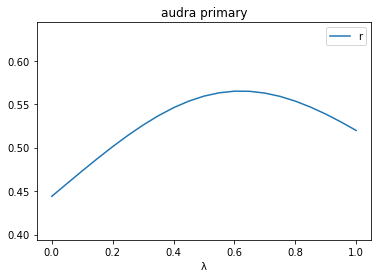

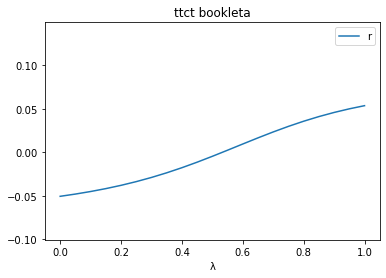

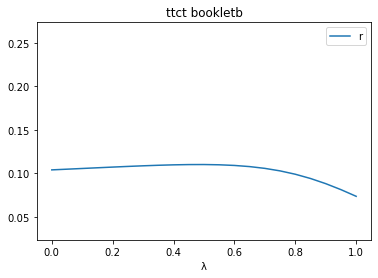

In [101]:
import numpy as np
groups = results.groupby(['test', 'task'])
for meta, group in groups:
    #print('\n\n###', meta, '###')
    smoothing_results = []
    step_size = .05
    for lam in np.arange(0, 1+step_size, step_size):
        x = (((1-lam) * group.blank_dist) + (lam * group.elaboration_raw))

        notnull = ~x.isna() & ~results.O.isna()
        if notnull.sum() < 2:
            continue
        corr, pval = pearsonr(x[notnull], group.O[notnull])
        smoothing_results.append((lam, corr, pval))
        #print(f"λ={lam.round(1)}, r={corr.round(2)}, pval={pval.round(4)}")
    # plot smoothing results in a sparkline
    if len(smoothing_results) == 0:
        continue
    smoothing_results = pd.DataFrame(smoothing_results, columns=['λ', 'r', 'pval'])
    ax = smoothing_results.plot(x='λ', y='r', kind='line', title=f"{meta[0]} {meta[1]}")
    # share y-axis values
    ax.set_ylim(smoothing_results.r.min()-.05, smoothing_results.r.min()+.2)